In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
fifa_data = pd.read_csv("fifa_data.csv", index_col=[0])
fifa_data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

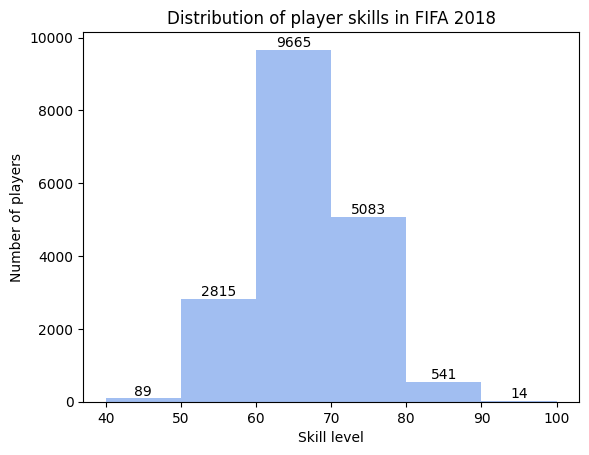

In [3]:
# We can edit the bins in the histogram, but there is a lot
# of literature about this. Let's do that just for understanding

bins = [b * 10 for b in range(4, 11)]
_, _, bars = plt.hist(fifa_data["Overall"], bins=bins, color="#a1bef1", align="mid")
plt.bar_label(bars)

plt.xticks(bins)
plt.ylabel("Number of players")
plt.xlabel("Skill level")
plt.title("Distribution of player skills in FIFA 2018")

plt.show()

### Pie chart

In [4]:
fifa_data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


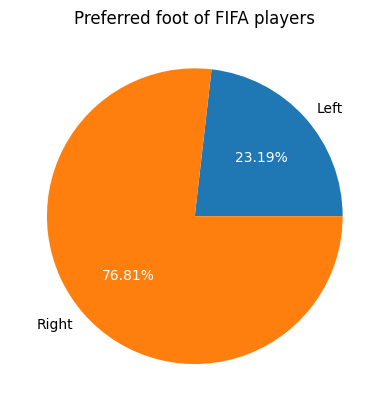

In [5]:
# Let's analice the preferred players' foot
left = fifa_data.loc[fifa_data["Preferred Foot"] == "Left"].count()["Preferred Foot"]
right = fifa_data.loc[fifa_data["Preferred Foot"] == "Right"].count()["Preferred Foot"]
labels = ["Left", "Right"]

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
patches, texts, autotexts = plt.pie([left, right], labels=labels, autopct="%.2f%%")
for text in autotexts:
    text.set_color("#fff")

plt.title("Preferred foot of FIFA players")
plt.show()

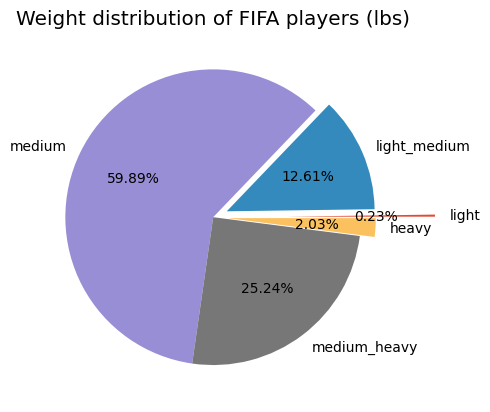

In [25]:
# let's format the weight column. It has the number and the units like this: 129lbs
fifa_data["Weight"] = [int(x.strip("lbs")) if type(x) == str else x for x in fifa_data["Weight"]]

plt.style.use("ggplot")

# we want to categorice player with their weight
light = fifa_data.loc[fifa_data["Weight"] < 125].count()[0]
light_medium = fifa_data.loc[
    (fifa_data["Weight"] >= 125) &
    (fifa_data["Weight"] < 150)
].count()[0]
medium = fifa_data.loc[
    (fifa_data["Weight"] >= 150) &
    (fifa_data["Weight"] < 175)
].count()[0]
medium_heavy = fifa_data.loc[
    (fifa_data["Weight"] >= 175) &
    (fifa_data["Weight"] < 200)
].count()[0]
heavy = fifa_data.loc[(fifa_data["Weight"] >= 200)].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ["light", "light_medium", "medium", "medium_heavy", "heavy"]

plt.title("Weight distribution of FIFA players (lbs)")
plt.pie(
    weights, labels=labels, autopct="%.2f%%",
    # We can add explode property to highlight slices in the pie chart
    explode=[.5, .1, 0, 0, .1],
)
plt.show()


### Box charts

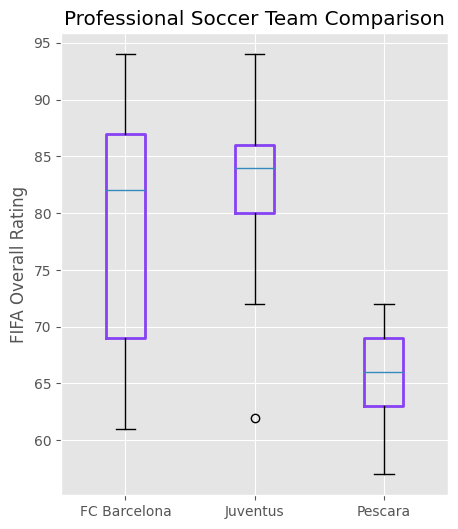

In [47]:
# Let's compare the soccer clubs
plt.figure(figsize=(5, 6))
team_1 = fifa_data.loc[fifa_data["Club"] == "FC Barcelona"]["Overall"]
team_2 = fifa_data.loc[fifa_data["Club"] == "Juventus"]["Overall"]
team_3 = fifa_data.loc[fifa_data["Club"] == "Pescara"]["Overall"]

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html returns a dict
boxes = plt.boxplot([team_1, team_2, team_3], labels=["FC Barcelona", "Juventus", "Pescara"])

for box in boxes["boxes"]:
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D
    # which has those properties
    box.set(color="#8642f4", linewidth=2, drawstyle="steps")

plt.title("Professional Soccer Team Comparison")
plt.ylabel("FIFA Overall Rating")
plt.show()
